# Biodiversity in National Parks

## Introduction

This project goal is to interpret and analyze data from 4 different National Parks about endarged spieces.

**Data sources**

Both `Observasiton.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com)

## Scope of work

Four sections were created to below to help guide the project's process and progress.

#### **1. Project goals**

This section will define the high-level objectives and set the intentions for this project.
The perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

#### **2. Data**

As for this project, the data is already provided but still needs to be checked if the project goals can be met with are available data.

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

#### **3. Analysis**
The analysis will have to be tought through, which include the methods and questions that are aligned with the project goals.

In this section, descriptive statistics and data visualisation techniques will be employed to understand the data better. `Statistical inference` will also be used to test if the observed values are statistically significant. Some of the key metrics that will computed include:
1. Distributions
2. counts
3. relationship between species
4. conservation status of species
5. observation of species in parks.


#### **4. Evaluation**
This chapter will help us build conclusions and findings from our analysis. It's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


## Loading the data

First, import the primary python modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# It is a magic function that renders the figure 
# in a notebook (instead of displaying a dump of the figure object)
%matplotlib inline

To analyze the status of conservation of species and their observaitons in the national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

#### **species** - DataFrame

The `species_info.csv` contains information on the different species in the National Parks. The culomns in the data set include:
- category - _categorical variable - nominal type_
- scientific name
- common name
- conservation status - _categorical variable - ordinal type_

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### **observations** - DataFrame

The `observations.csv` contains information on the different species observed in the National Parks. The culomns in the data set include:
- scientific name
- park name - _categorical variable - nominal_
- observations - _numerical variable - discrete_

In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Explore the Data

#### Data characteristics

Based on the preview of the datasets, the `species` dataframe is dictonary like table in which a certain animal is categorized including its converstaion status. The `observations` dataframe had been made recently, indicating the different species observed number.

The dimensions of the data sets:

In [4]:
print(f'species shape: {species.shape}')
print(f'observaitons shape: {observations.shape}')


species shape: (5824, 4)
observaitons shape: (23296, 3)


The monitoring of the spieces took place into 3 National parks. Namely:

In [5]:
print(observations.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Sum of the observations is 3,314,739

In [6]:
observations.observations.sum()

3314739

Observed speices by park:

In [7]:
observations.groupby('park_name').observations.sum()

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

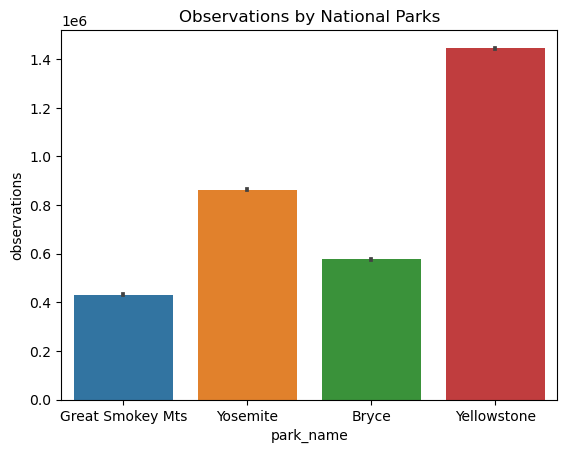

In [8]:
ax = plt.subplot()
sns.barplot(data=observations, y=observations.observations, x=observations.park_name, estimator="sum")
ax.set_xticklabels(['Great Smokey Mts', 'Yosemite', 'Bryce', 'Yellowstone'])
#plt.xticks(rotation=30, fontsize=8)
plt.title('Observations by National Parks', fontsize=12)
plt.show()

In [9]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


Is there any obsered species can be found in spieces dataframe? The following for loop tested if there is any. It seems, that the two dataframes are consequent.

In [10]:
for index in range(0, len(observations.scientific_name)):
    if observations['scientific_name'][index] not in species.scientific_name.values:
        print(f'{observations["scientific_name"][index]} is not found in species dataframe')

There are 7 `category` including animals and plants.

In [11]:
print(f'number of categories: {species.category.nunique()}')
print(f'categories: {species.category.unique()}')

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [12]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

#### Exploring the `scientific_name` column:

There is 5541 unique item in the scientific_name column, although the column length is 5824. 

In [13]:
species.scientific_name.nunique()

5541

In [14]:
species[species.scientific_name.duplicated() & species.conservation_status.notna()]

,category,scientific_name,common_names,conservation_status
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3035,Mammal,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",Species of Concern
3037,Mammal,Lasionycteris noctivagans,"Silver-Haired Bat, Silver-Haired Bat",Species of Concern
3042,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern
3081,Bird,Pandion haliaetus,"Osprey, Western Osprey",Species of Concern
3150,Bird,Gavia immer,"Common Loon, Great Northern Diver, Great North...",Species of Concern
3185,Bird,Riparia riparia,"Bank Swallow, Sand Martin",Species of Concern
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
4457,Mammal,Taxidea taxus,Badger,Species of Concern


In [15]:
species[species['scientific_name'] == 'Eptesicus fuscus']

,category,scientific_name,common_names,conservation_status
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
3035,Mammal,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",Species of Concern


In [16]:
species[species['scientific_name'] == 'Cervus elaphus']

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN


#### Cleaning - duplicaitons

It seems, there are some duplicaitons based on the scietific name. Therefore it needs `cleaning`.

    1. If the conversation status is NaN, the duplicate can be dropped

In [17]:
drop_i = species[species.conservation_status.isna() & species.scientific_name.duplicated()].index
drop_i = drop_i.to_list()
drop_i[:6]

[3017, 3019, 3022, 3025, 3028, 3030]

    2. Creating a list, which contains duplicaited speaces names with conversation status.

In [18]:
species_names = species[species.scientific_name.duplicated() & species.conservation_status.notna()].scientific_name
species_names = species_names.to_list()

In [19]:
# The fromkeys() method are used to create a dictonary, in which the species_names are the keys.
# In the dictionary, the keys cannot be duplicated, consequently it is removes the duplications
# automatically.
# Finnaly, the dictonary is converted back to a list.
species_names = list(dict.fromkeys(species_names))
species_names

['Canis lupus',
 'Eptesicus fuscus',
 'Lasionycteris noctivagans',
 'Myotis lucifugus',
 'Pandion haliaetus',
 'Gavia immer',
 'Riparia riparia',
 'Oncorhynchus mykiss',
 'Taxidea taxus',
 'Myotis californicus',
 'Nycticorax nycticorax']

In [20]:
species[species['scientific_name'].isin(species_names)].sort_values(by=['scientific_name'])

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3035,Mammal,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",Species of Concern
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
172,Bird,Gavia immer,Common Loon,Species of Concern
3150,Bird,Gavia immer,"Common Loon, Great Northern Diver, Great North...",Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
3037,Mammal,Lasionycteris noctivagans,"Silver-Haired Bat, Silver-Haired Bat",Species of Concern
3039,Mammal,Myotis californicus,"California Myotis, California Myotis, Californ...",Species of Concern


Custom indexes are selected based on the filter list above. These indexes are added to the `drop_i` list.

In [21]:
drop_i.extend([8, 3020, 29, 172, 30, 4465, 37, 4467, 4564, 560, 104, 226, 4457])
drop_i[-12:]

[3020, 29, 172, 30, 4465, 37, 4467, 4564, 560, 104, 226, 4457]

Drop those indexes, which specified in _drop_i_ list:

In [22]:
species.loc[drop_i]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
3028,Mammal,Mustela vison,"American Mink, Mink",NaN
...,...,...,...,...
4564,Bird,Nycticorax nycticorax,Black-Crowned Night Heron,Species of Concern
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
104,Bird,Pandion haliaetus,Osprey,Species of Concern
226,Bird,Riparia riparia,Bank Swallow,Species of Concern


In [23]:
species.drop(labels=drop_i, inplace=True)


In [24]:
species.shape

(5541, 4)

In [25]:
species[species.scientific_name.duplicated()]

,category,scientific_name,common_names,conservation_status


#### Exploring the `conservation_status` column

The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values. 

In [26]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

The next count shows number each species in the breakdown of the categories in `converstion_status`. All over the 4 National Parks, there are 151 `Species of Concern`, 15 `Endangered`, 10 `Threatened` and 3 `In Recovery`. The latter is categorized as `nan`.

In [27]:
species.groupby('conservation_status').size()

conservation_status
Endangered             15
In Recovery             3
Species of Concern    151
Threatened             10
dtype: int64

#### Missing values: Structurally missing data

In the `species` dataframe the `nan` values mean, that the certain species are not under any conservation status. Therefore, these `nan` values can be replaced with something meaningfull, like `No Intervention`

In [28]:
species.conservation_status.fillna(value='No Intervention', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              15
In Recovery              3
No Intervention       5362
Species of Concern     151
Threatened              10
dtype: int64

## Analysis

### Distribution

The first step of the analysis is to dive deeper and find out the `distribution of the conservation statues for each spieces`.

In [29]:
aggregate = species[species.conservation_status!='No Intervention'].groupby(['category' ,'conservation_status']).size().reset_index(name='counts')
aggregate

,category,conservation_status,counts
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
3,Bird,Endangered,4
4,Bird,In Recovery,3
5,Bird,Species of Concern,68
6,Fish,Endangered,3
7,Fish,Species of Concern,4
8,Fish,Threatened,4
9,Mammal,Endangered,6


In [30]:
pivot = aggregate.pivot(index='conservation_status',
                        columns='category',
                        values='counts')
pivot

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


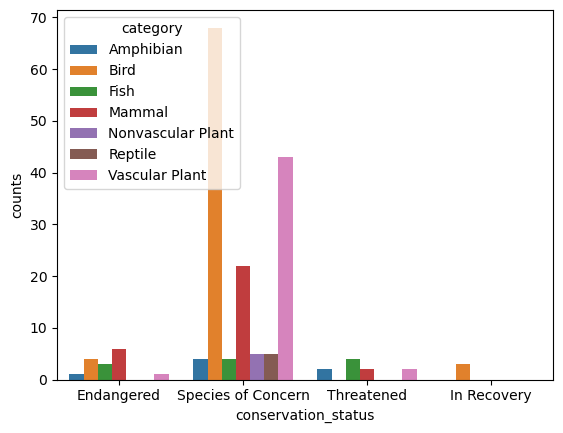

In [31]:
sns.barplot(data=aggregate, 
            x="conservation_status", 
            y="counts", 
            hue="category",
            errorbar=None)
plt.show()

Text(0, 0.5, 'Number of Species')

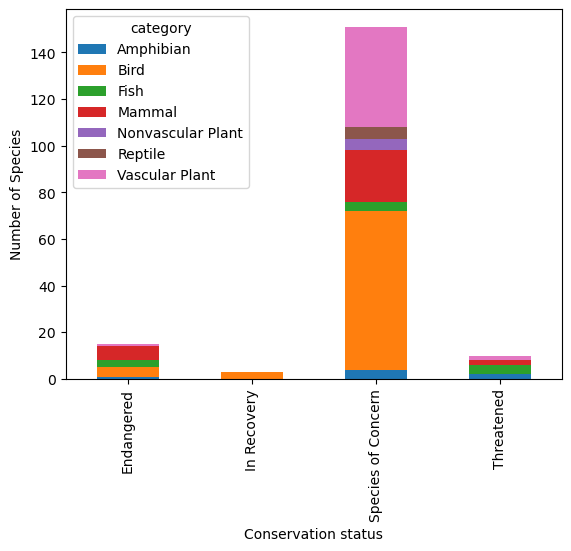

In [32]:
ax = pivot.plot(kind='bar', stacked=True)
ax.set_xlabel('Conservation status')
ax.set_ylabel('Number of Species')

### In conservaiton - probabilites

The next question is if certain types of species are more likely to be endangered? In other words, the what is the likelyhood of a cerain species being categorized as endangered?

To answer this question, a new column shall be added to differentiate whether a certain species is protected or not.

In [33]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


Grouping the categories based on `is_protected` counts.

In [34]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()
category_counts

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,114
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [35]:
category_counts = category_counts.pivot(columns='is_protected',
                         index='category',
                         values='scientific_name').reset_index()
category_counts

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,114,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [36]:
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,114,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Certain species of `Mammals` and `Birds` are more likely to be endangered.

In [37]:
category_counts['percent_protected'] = category_counts.protected / \
                                        (category_counts.not_protected + category_counts.protected) *100
category_counts.sort_values('percent_protected', ascending=False).round(2)

,category,not_protected,protected,percent_protected
3,Mammal,146,30,17.05
1,Bird,413,75,15.37
0,Amphibian,72,7,8.86
2,Fish,114,11,8.80
5,Reptile,73,5,6.41
4,Nonvascular Plant,328,5,1.50
6,Vascular Plant,4216,46,1.08


### Statistical significance - contingency tables

Contingency tables will be used to assess wheter there is an association between two categocical vaiables.

In [38]:
def create_cont_table(category_name_1, category_name_2):
    return [[category_counts.protected[category_counts.category==category_name_1].iloc[0],
             category_counts.not_protected[category_counts.category==category_name_1].iloc[0]],
            [category_counts.protected[category_counts.category==category_name_2].iloc[0],
             category_counts.not_protected[category_counts.category==category_name_2].iloc[0]]]

In [39]:
create_cont_table('Mammal', 'Bird')

[[30, 146], [75, 413]]

The following code will evaluate if different species have statistically significant differences in conservation status rates. The standard p-value to test statistical significance is 0.05. Every value below this threshold considered as a statistically significant test.

In [40]:
import itertools as it
from scipy.stats import chi2_contingency

#iterating through list of categories, making them pairs without repetion
for a, b in it.combinations(category_counts.category.to_list(), 2):
    #contingency tables frequencies
    cont_table = create_cont_table(a, b)
    chi2, pval, dof, expected = chi2_contingency(cont_table)

    if pval <= 0.05:
        print(f"{a} and {b} - p-value {pval.round(4)}")
    
    

Amphibian and Nonvascular Plant - p-value 0.0018
Amphibian and Vascular Plant - p-value 0.0
Bird and Nonvascular Plant - p-value 0.0
Bird and Vascular Plant - p-value 0.0
Fish and Nonvascular Plant - p-value 0.0005
Fish and Vascular Plant - p-value 0.0
Mammal and Nonvascular Plant - p-value 0.0
Mammal and Reptile - p-value 0.0384
Mammal and Vascular Plant - p-value 0.0
Nonvascular Plant and Reptile - p-value 0.0336
Reptile and Vascular Plant - p-value 0.0001


### Most prevalent animal in the parks

The next set of analysis will come from data from conservasionists as they have been recording sightings of different species at 4 National Parks.

First, lets have a look at the following sorted values, which indicates the most observed sub-species: the _Western Painted Turtle_. It is a good assumption, that the turtule will be the most prevalent species.

In [41]:
# adding the common name and category to the observation dataframe
observations['common_name'] = observations.scientific_name\
                                .apply(lambda com_name : species['common_names'][species['scientific_name']==com_name].iloc[0])
observations['category'] =  observations.scientific_name\
                                .apply(lambda com_name : species['category'][species['scientific_name']==com_name].iloc[0])

In [42]:
observations[(observations['category'] != 'Vascular Plant')\
                & (observations['category'] != 'Nonvascular Plant')]\
                        .sort_values('observations', ascending=False).head(10)

,scientific_name,park_name,observations,common_name,category
21539,Chrysemys picta bellii,Yellowstone National Park,307,Western Painted Turtle,Reptile
486,Spinus lawrencei,Yellowstone National Park,305,Lawrence's Goldfinch,Bird
7321,Aythya americana,Yellowstone National Park,304,Redhead,Bird
7294,Ambystoma opacum,Yellowstone National Park,301,Marbled Salamander,Amphibian
2189,Perdix perdix,Yellowstone National Park,300,"Gray Partridge, Grey Partridge",Bird
8164,Etheostoma sanguifluum,Yellowstone National Park,300,"Bloodfin Darter, Spotted Darter",Fish
7382,Thamnophis sirtalis fitchi,Yellowstone National Park,299,Valley Garter Snake,Reptile
5761,Myiarchus crinitus,Yellowstone National Park,298,Great Crested Flycatcher,Bird
8136,Setophaga coronata,Yellowstone National Park,298,Yellow-Rumped Warbler,Bird
16960,Quiscalus mexicanus,Yellowstone National Park,297,Great-Tailed Grackle,Bird


The next step to identify the most prevalent animal based on the `common names` in `species` dataframe.
This `common name` column shall be split into individual words. 

In [43]:
from itertools import chain
import string

# removing puctuation like: , - ' ;
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
    
# make a separate list with lower case and splitted words
common_Names = species[(species.category != 'Vascular Plant') & (species.category != 'Nonvascular Plant')]\
                    .common_names\
                    .apply(remove_punctuations)\
                    .str.lower()

common_Names = common_Names.str.split().to_list()
common_Names[:6]

[['gappers', 'redbacked', 'vole'],
 ['american', 'bison', 'bison'],
 ['aurochs',
  'aurochs',
  'domestic',
  'cattle',
  'feral',
  'domesticated',
  'cattle'],
 ['domestic', 'sheep', 'mouflon', 'red', 'sheep', 'sheep', 'feral'],
 ['wapiti', 'or', 'elk'],
 ['whitetailed', 'deer']]

Deleting the duplications from each row.

In [44]:
common_Names_cleaned = []

for item in common_Names:
    # duplication cleaning: creating a dictionary from keys, and converting back the keys to dictionary
    item = list(dict.fromkeys(item))
    common_Names_cleaned.append(item)

In [45]:
common_Names_cleaned[:6]

[['gappers', 'redbacked', 'vole'],
 ['american', 'bison'],
 ['aurochs', 'domestic', 'cattle', 'feral', 'domesticated'],
 ['domestic', 'sheep', 'mouflon', 'red', 'feral'],
 ['wapiti', 'or', 'elk'],
 ['whitetailed', 'deer']]

Next the words need to be collapsed into one list for easier use.

In [46]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in common_Names_cleaned))
res[:6]

['gappers', 'redbacked', 'vole', 'american', 'bison', 'aurochs']

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `warbler` occurred 59 times while `salamander` came up 41 times.

In [47]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i, x))

In [48]:
words_counted[:6]

[('gappers', 1),
 ('redbacked', 4),
 ('vole', 10),
 ('american', 27),
 ('bison', 2),
 ('aurochs', 1)]

In [49]:
# making a set of the counted items
prevalent_animals = pd.DataFrame(set(words_counted), columns=['Word', 'Count'])

In [50]:
prevalent_animals.sort_values('Count', ascending=False).head(15)

,Word,Count
775,warbler,59
396,northern,47
427,salamander,41
126,eastern,38
399,western,30
792,sparrow,28
227,snake,28
726,american,27
655,common,25
282,mountain,20


In [51]:
species['is_warbler'] = species['common_names'].str.contains('Warbler')
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_warbler
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [52]:
warbler_observations = observations.merge(species[species.is_warbler])
warbler_observations

,scientific_name,park_name,observations,common_name,category,common_names,conservation_status,is_protected,is_warbler
0,Vermivora celata,Yosemite National Park,106,Orange-Crowned Warbler,Bird,Orange-Crowned Warbler,No Intervention,False,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Orange-Crowned Warbler,Bird,Orange-Crowned Warbler,No Intervention,False,True
2,Vermivora celata,Yellowstone National Park,281,Orange-Crowned Warbler,Bird,Orange-Crowned Warbler,No Intervention,False,True
3,Vermivora celata,Bryce National Park,121,Orange-Crowned Warbler,Bird,Orange-Crowned Warbler,No Intervention,False,True
4,Setophaga dominica,Yosemite National Park,140,Yellow-Throated Warbler,Bird,Yellow-Throated Warbler,No Intervention,False,True
...,...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Virginia's Warbler,Bird,Virginia's Warbler,No Intervention,False,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Yellow Warbler,Bird,Yellow Warbler,No Intervention,False,True
233,Setophaga petechia,Yellowstone National Park,245,Yellow Warbler,Bird,Yellow Warbler,No Intervention,False,True
234,Setophaga petechia,Bryce National Park,134,Yellow Warbler,Bird,Yellow Warbler,No Intervention,False,True


In [53]:
warbler_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


In [54]:
warbler_pivot = warbler_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
warbler_pivot

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


Below is the output of the last data manipulation. From this chart one can see the Yellowstone registered the most warbler birds. The same percetage of warbler sub-species were observed though all the four parks.

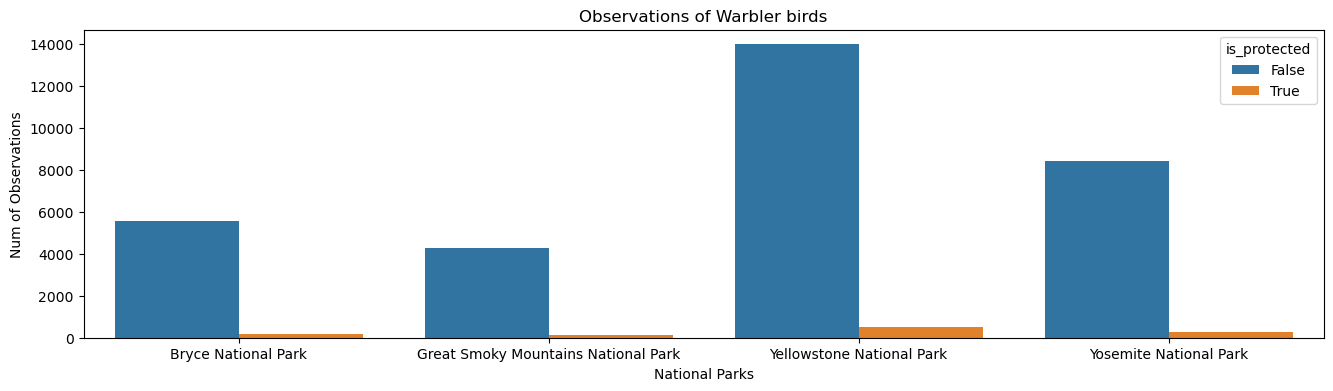

In [55]:
plt.figure(figsize=(16, 4))
sns.barplot(data=warbler_pivot, x='park_name', y='observations', hue='is_protected')
plt.xlabel('National Parks')
plt.ylabel('Num of Observations')
plt.title('Observations of Warbler birds')
plt.show()

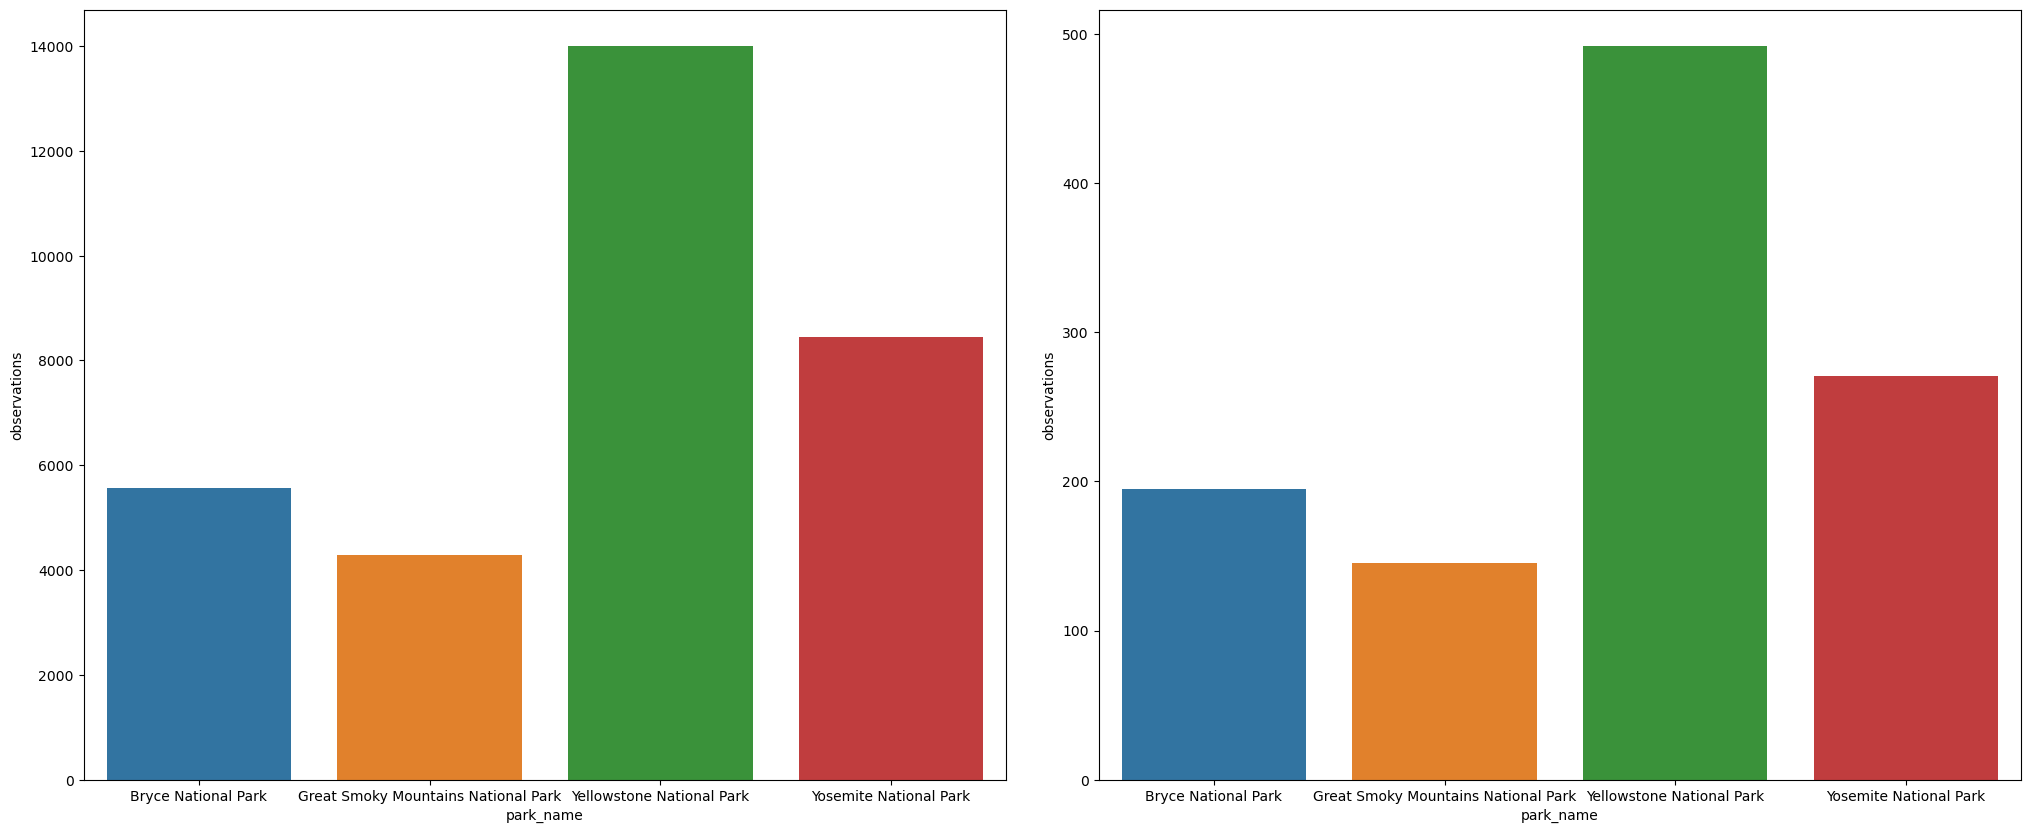

In [56]:
plt.figure(figsize=(25, 10))

ax1 = plt.subplot(1, 2, 1) #(row, columns, num of plot)
sns.barplot(x=warbler_pivot.park_name, y=warbler_pivot[warbler_pivot.is_protected==False].observations)

ax2 = plt.subplot(1, 2, 2) #(row, columns, num of plot)
sns.barplot(x=warbler_pivot.park_name, y=warbler_pivot[warbler_pivot.is_protected==True].observations)

plt.subplots_adjust(wspace=0.1,) #adjusting width sapce

plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that warblers occurred the most number of times and they were most likely to be found in Yellowstone National Park.